# Setup

This notebook is for loading behavioral data from different sessions to analyze together.

In [1]:
import pandas as pd
import sys
sys.path.append('Rotation')
sys.path.append('DKO_behavior')

In [2]:
#rotation data
from get_rotation_data import d, SUMdf
rt_d = d
rt_SUMdf = SUMdf

#DKO data
from get_DKO_data import d, SUMdf
dk_d = d
SUMdf['Genotype'] = 'DKO'
dk_SUMdf = SUMdf

#combine them
all_SUMdf = pd.concat([rt_SUMdf, dk_SUMdf]).dropna(axis=1) #dropna gets rid of columns with NaN's, i.e. tasks without all genotypes represented
all_SUMdf.loc[all_SUMdf['Genotype'].str.contains('\+'), 'Genotype'] = 'WT' #change 'Syt3+/+' and 'Syt7+/+' to 'WT'

loading grooming data...
fetching genotypes...
28 subjects found
loading marble data...
loading light-dark data...
done :)
loading open field data...
8 subjects found
loading light-dark data...
loading grooming data...
done C:


In [4]:
all_d = {**rt_d, **d} #combined animal dictionaries
all_SUMdf

,Subj,SG duration,SG bouts,Genotype,LD % light,LD distance,LD transitions
0,Cage1_RnLn,73.460,17,Syt3-/-,24.775862,7.279450,75
1,Cage2_RnLn,31.385,13,WT,32.068966,8.090321,71
2,Cage4_Rn,95.722,30,WT,20.545977,5.790414,77
3,Cage3_Rn,117.224,21,Syt3-/-,24.810345,7.311542,107
4,Cage4_Ln,32.839,26,WT,33.212644,8.967065,66
5,Cage1_Rn,57.052,18,Syt3-/-,11.885057,5.621638,30
6,Cage8_Ln,73.914,32,Syt7-/-,19.396552,5.670406,79
7,Cage3_Ln,38.114,24,Syt3-/-,22.890805,7.343619,56
8,Cage9_Rn,65.190,31,Syt3-/-,36.919540,9.369397,113
9,Cage2_RnRn,25.755,21,WT,29.517241,7.935748,61


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [6]:
order = ['WT','Syt7-/-','Syt3-/-','DKO']
pal = sns.color_palette('colorblind')
colors = pal.as_hex()[0:4]

In [8]:
from scipy import stats

C:\Users\lemoing\AppData\Local\Temp\1\ipykernel_7348\4147834219.py:2: FutureWarning: ['Subj'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  dfstat = all_SUMdf.groupby(['Genotype']).agg([np.mean, stats.sem])


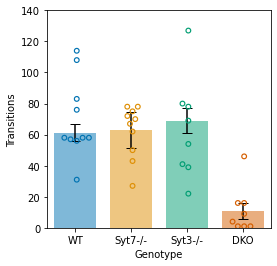

In [9]:
measure = 'LD transitions'
dfstat = all_SUMdf.groupby(['Genotype']).agg([np.mean, stats.sem])
data = dfstat[measure].reindex(order)
f,ax = plt.subplots(1)
data.plot(kind='bar', y='mean', ax=ax, color=colors, legend=False, width=.75, alpha = 0.5)
sns.swarmplot(x='Genotype',y=measure, data=all_SUMdf, hue='Genotype', palette='colorblind', ax=ax, marker="$\circ$", s=9)
ax.errorbar(y=data['mean'], x=data.index, yerr=data['sem'], color='black', capsize=5, ls='none');
f.set_size_inches(4,4)
ax.set_xticklabels(labels=order,rotation=0)
ax.set_ylabel('Transitions');
ax.get_legend().remove()
ax.set_ylim(0,140);

In [38]:
def plot(measure):
    plt.figure(figsize = (4,4))
    sns.barplot(x='Genotype',y=measure, data=all_SUMdf, capsize=.1, ci='sd', order=order, errwidth=1.5, palette='colorblind')
    sns.swarmplot(x='Genotype',y=measure, data=all_SUMdf, color="0", order=order).set(title=measure)

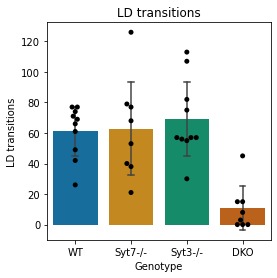

In [39]:
plot('LD transitions')

In [11]:
all_SUMdf.loc[all_SUMdf['Genotype']=='DKO', 'order'] = 3

In [12]:
all_SUMdf.sort_values('order', inplace=True)
all_SUMdf

,Subj,SG duration,SG bouts,Genotype,LD % light,LD distance,LD transitions,order
0,43_2_AF2_RnRn,43.473,32,DKO,0.000000,0.000000,0,3.0
1,44AM_Rn,50.964,36,DKO,0.000000,0.000000,0,3.0
2,43_2_AF2_RnLn,86.108,33,DKO,20.965517,5.981293,15,3.0
3,43_2_AF1_RnLn,189.986,51,DKO,4.264368,3.511664,3,3.0
4,44AM_Ln,170.245,34,DKO,0.000000,0.000000,0,3.0
5,43_1_BM_Ln,31.034,27,DKO,46.304598,12.929583,8,3.0
6,43_2_AF1_Ln,53.436,23,DKO,8.235632,3.776556,15,3.0
7,43_1_AM2_Ln,45.201,34,DKO,47.017241,9.769531,45,3.0
0,Cage1_RnLn,73.460,17,Syt3-/-,24.775862,7.279450,75,NaN
1,Cage2_RnLn,31.385,13,WT,32.068966,8.090321,71,NaN


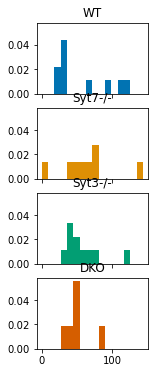

In [13]:
# histograms of cumulative groom times
f,ax=plt.subplots(4,1, figsize=(2,6), sharex=True, sharey=True)
for i,gp in enumerate(order):
    ax[i].hist(all_SUMdf.loc[all_SUMdf['Genotype']==gp, 'SG duration'], color=colors[i], bins=np.arange(0,150, 9), density=True)
    ax[i].title.set_text(gp)

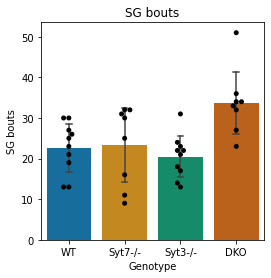

In [14]:
plot('SG bouts')

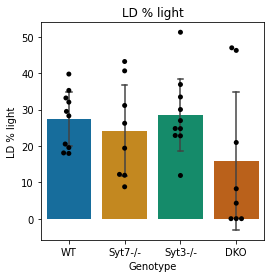

In [15]:
plot('LD % light')

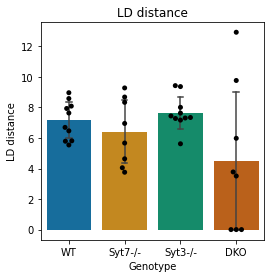

In [16]:
plot('LD distance')

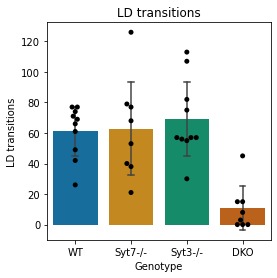

In [17]:
plot('LD transitions')

In [19]:
dfstat = dk_SUMdf.groupby(['Genotype']).agg([np.mean, stats.sem])

C:\Users\lemoing\AppData\Local\Temp\1\ipykernel_7348\1091912756.py:1: FutureWarning: ['Subj'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  dfstat = dk_SUMdf.groupby(['Genotype']).agg([np.mean, stats.sem])


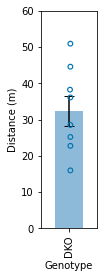

In [21]:
measure = 'OF distance'
data = dfstat[measure]
f,ax = plt.subplots(1)
data.plot(kind='bar', y='mean', ax=ax, legend=False, width=.5, alpha = 0.5)
sns.swarmplot(x='Genotype', y=measure, data=dk_SUMdf, hue='Genotype', palette='colorblind', ax=ax, marker="$\circ$", s=9)
ax.errorbar(y=data['mean'], x=data.index, yerr=data['sem'], color='black', capsize=5, ls='none');
f.set_size_inches(1,4)
ax.set_ylabel('Distance (m)');
ax.get_legend().remove()
ax.set_ylim(0,60);

In [24]:
measures = ['SG duration', 'SG bouts', 'LD % light', 'LD distance', 'LD transitions']

In [25]:
#look for normality
for measure in measures:
    for geno in order:
        stat,p = stats.shapiro(all_SUMdf.loc[all_SUMdf['Genotype']==geno, measure])
        if p<0.05: print(measure, geno, p)

SG duration WT 0.009530543349683285
SG duration Syt3-/- 0.04895211011171341
SG duration DKO 0.014763850718736649
LD % light DKO 0.013255772180855274
LD transitions DKO 0.00805178564041853


In [26]:
all_SUMdf.head()

,Subj,SG duration,SG bouts,Genotype,LD % light,LD distance,LD transitions,order
0,43_2_AF2_RnRn,43.473,32,DKO,0.000000,0.000000,0,3.0
1,44AM_Rn,50.964,36,DKO,0.000000,0.000000,0,3.0
2,43_2_AF2_RnLn,86.108,33,DKO,20.965517,5.981293,15,3.0
3,43_2_AF1_RnLn,189.986,51,DKO,4.264368,3.511664,3,3.0
4,44AM_Ln,170.245,34,DKO,0.000000,0.000000,0,3.0


In [27]:
for measure in measures:
    print(measure)
    for geno1 in order:
        for geno2 in order[:-1]:
            if geno1 != geno2:
                data1 = all_SUMdf.loc[all_SUMdf['Genotype']==geno1, measure]
                data2 = all_SUMdf.loc[all_SUMdf['Genotype']==geno2, measure]
                stat,p = stats.mannwhitneyu(data1, data2)
                if p<0.05:
                    print(geno1, geno2, p)
    print('\n')

SG duration


SG bouts
DKO WT 0.005014551913657613
DKO Syt7-/- 0.02343308324225073
DKO Syt3-/- 0.001356987499144938


LD % light


LD distance


LD transitions
DKO WT 0.0008307934516774577
DKO Syt7-/- 0.002663119259138549
DKO Syt3-/- 0.0005886030653565745




In [29]:
WTS7data = all_SUMdf.loc[(all_SUMdf['Genotype']=='WT')|(all_SUMdf['Genotype']=='Syt7-/-')]

In [30]:
datasts = WTS7data.groupby('Genotype').agg([np.mean, stats.sem])

C:\Users\lemoing\AppData\Local\Temp\1\ipykernel_7348\81873223.py:1: FutureWarning: ['Subj'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  datasts = WTS7data.groupby('Genotype').agg([np.mean, stats.sem])


In [31]:
manu_cols = ['#000000','#FF0000']

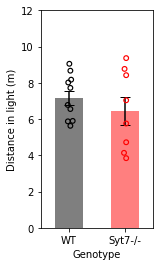

In [32]:
measure = 'LD distance'
data = datasts[measure].sort_index(ascending=False)
f,ax = plt.subplots(1)
data.plot(kind='bar', y='mean', ax=ax, legend=False, width=.5, alpha = 0.5, color=manu_cols)
sns.swarmplot(x='Genotype', y=measure, data=WTS7data, hue='Genotype', palette=manu_cols, ax=ax, marker="$\circ$", s=9)
ax.errorbar(y=data['mean'], x=data.index, yerr=data['sem'], color='black', capsize=5, ls='none');
f.set_size_inches(2,4)
ax.set_ylabel('Distance in light (m)');
ax.get_legend().remove()
ax.set_xticklabels(labels=['WT','Syt7-/-'], rotation=0)
ax.set_ylim(0,12);

In [33]:
datasts.sort_index(ascending=False)

SG duration            SG bouts           LD % light            \
                mean        sem     mean       sem       mean       sem   
Genotype                                                                  
WT           58.2427  12.282676    22.70  1.961009  27.433333  2.497077   
Syt7-/-      62.1570  13.407616    23.25  3.452484  24.201149  4.710181   

         LD distance           LD transitions            order      
                mean       sem           mean        sem  mean sem  
Genotype                                                            
WT          7.153144  0.394167          61.20   5.374425   NaN NaN  
Syt7-/-     6.422013  0.775907          62.75  11.544557   NaN NaN

In [34]:
rt_SUMdf.loc[rt_SUMdf['Genotype'].str.contains('\+'), 'Genotype'] = 'WT'
WTS7data = rt_SUMdf.loc[(rt_SUMdf['Genotype']=='WT')|(rt_SUMdf['Genotype']=='Syt7-/-')]

In [40]:
WTS7data.loc[WTS7data['Genotype']=='WT', 'order'] = 0
WTS7data.loc[WTS7data['Genotype']=='Syt7-/-', 'order'] = 1